# Camunda 8 Workers:
## Power Consumption at Startup

These Measurements were done with Kepler on `restworkerjava`. Scrape interval was **30 seconds**.

*30.11.23, Author: Jan Wittrowski*

### Cheatsheet

```df.loc[row, col]```

# Sum up the first three cells of each column
sum_first_three = df.iloc[:3].sum()


## Importing, Preparation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read first CSV containing idle measurement 1-7
rawdata = pd.read_csv("CSV/idle_1_7_all_pods_power.csv", 
                     header=1 # which row contains column headers
                    ) # which column contains labels

# read 2nd CSV cotaining idle measurementes 8-14
rawdata2 = pd.read_csv("CSV/idle_8_14_all_pods_power.csv", 
                     header=1 # which row contains column headers
                    ) # which column contains labels

# read 3rd CSV containing idle measurements 15 and 16
rawdata3 = pd.read_csv("CSV/idle_15_16_all_pods_power.csv", 
                      header=1 # which row contains column headers
                     ) # which column contains labels


In [20]:
#concatenate both df

data = pd.concat([rawdata, rawdata2, rawdata3], ignore_index=True)

# data = data.set_index('Time')

data

,Time,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,...,restworkerjava-77c95dd488-5z6bl / worker / OTHER,restworkerjava-7f99bf486d-5rv2m / worker / OTHER,restworkerjava-86b6d57d68-95jmw / worker / OTHER,restworkerjava-fdcf7776b-dt2lz / worker / OTHER,restworkerjava-86b6d57d68-z6cv2 / worker / PKG,restworkerjava-cb56d4547-dndnt / worker / PKG,restworkerjava-86b6d57d68-z6cv2 / worker / DRAM,restworkerjava-cb56d4547-dndnt / worker / DRAM,restworkerjava-86b6d57d68-z6cv2 / worker / OTHER,restworkerjava-cb56d4547-dndnt / worker / OTHER
0,2023-11-28 14:15:00,0.188,0.201,0.463,0.460,0.227,0.188,1.300,0.424,0.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-28 14:15:30,0.188,0.202,0.458,0.441,0.219,0.188,1.220,0.384,0.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-28 14:16:00,0.188,0.200,0.448,0.452,0.227,0.188,1.160,0.382,0.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-11-28 14:16:30,0.188,0.199,0.415,0.415,0.211,0.188,1.020,0.350,0.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-28 14:17:00,0.188,0.200,0.435,0.436,0.221,0.188,1.080,0.362,0.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2023-11-30 11:43:00,0.180,0.219,0.536,0.533,0.262,0.221,3.010,0.756,0.187,...,NaN,NaN,NaN,NaN,NaN,0.197,NaN,0.0193,NaN,0.0
901,2023-11-30 11:43:30,0.180,0.191,0.411,0.412,0.203,0.195,0.948,0.332,0.182,...,NaN,NaN,NaN,NaN,NaN,0.185,NaN,0.0189,NaN,0.0
902,2023-11-30 11:44:00,0.180,0.189,0.401,0.401,0.200,0.190,0.840,0.312,0.183,...,NaN,NaN,NaN,NaN,NaN,0.185,NaN,0.0190,NaN,0.0
903,2023-11-30 11:44:30,0.180,0.189,0.403,0.399,0.200,0.193,0.823,0.309,0.182,...,NaN,NaN,NaN,NaN,NaN,0.185,NaN,0.0190,NaN,0.0


In [44]:
# remove columns from domain "OTHER"

columns_to_keep = [col for col in data.columns if 'OTHER' not in col]
data = data.loc[:, columns_to_keep]

columns_to_keep


['Time',
 'bpmndeployment-8l9w6 / camunda8 / PKG',
 'camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG',
 'camunda-platform-elasticsearch-master-0 / camunda8 / PKG',
 'camunda-platform-elasticsearch-master-1 / camunda8 / PKG',
 'camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG',
 'camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG',
 'camunda-platform-zeebe-0 / camunda8 / PKG',
 'camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG',
 'console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG',
 'processstart-xb5jm / camunda8 / PKG',
 'coredns-77ccd57875-qkp4q / kube-system / PKG',
 'helm-install-traefik-crd-hzktt / kube-system / PKG',
 'helm-install-traefik-ncp5n / kube-system / PKG',
 'local-path-provisioner-957fdf8bc-jnlfw / kube-system / PKG',
 'metrics-server-648b5df564-msqlc / kube-system / PKG',
 'svclb-traefik-5671c552-795qx / kube-system / PKG',
 'traefik-768bdcdcdd-4f8ms / kube-system / PKG',
 'test-responder-5

In [28]:
# select all restworkerjava pkg names

pkg_columns = [col for col in data.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'PKG'])]

pkg_columns

['restworkerjava-56655bdb84-tndnx / worker / PKG',
 'restworkerjava-5bff59f95d-5ghvj / worker / PKG',
 'restworkerjava-67c4cdf457-bc649 / worker / PKG',
 'restworkerjava-687b67c59f-g7szb / worker / PKG',
 'restworkerjava-7949956cf9-xgkss / worker / PKG',
 'restworkerjava-7b6d76448-d7k55 / worker / PKG',
 'restworkerjava-7bf68d4499-2p867 / worker / PKG',
 'restworkerjava-f54f67586-6k8q5 / worker / PKG',
 'restworkerjava-556c56b566-dx98j / worker / PKG',
 'restworkerjava-5cbbbdbc55-qxwl4 / worker / PKG',
 'restworkerjava-67fb7c7c59-v7wmm / worker / PKG',
 'restworkerjava-6bb6fdcc85-k4kdh / worker / PKG',
 'restworkerjava-77c95dd488-5z6bl / worker / PKG',
 'restworkerjava-7f99bf486d-5rv2m / worker / PKG',
 'restworkerjava-86b6d57d68-95jmw / worker / PKG',
 'restworkerjava-fdcf7776b-dt2lz / worker / PKG',
 'restworkerjava-86b6d57d68-z6cv2 / worker / PKG',
 'restworkerjava-cb56d4547-dndnt / worker / PKG']

In [31]:
worker_series = []

for col in pkg_columns:
    first_index = data[col].first_valid_index()
    
    # set start interval
    # start 90seconds before first scrape from worker pod
    starting_point = max(first_index - 3, 0)
    # end 150seconds after first scrape from worker pod
    end_point = first_index + 5
    
    # remove all workers not belonging
    worker_cols_to_keep

    frame = data.loc[starting_point:end_point,:]
    frame = frame.set_index('Time')
    frame = frame.dropna(how="all", axis=1)

    worker_series.append(frame)

worker_series[3]

,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,processstart-xb5jm / camunda8 / PKG,...,kepler-8czsm / monitoring / DRAM,kube-prometheus-stackr-grafana-6b8fb957c8-62pgz / monitoring / DRAM,kube-prometheus-stackr-kube-state-metrics-6d5579569-7w9tb / monitoring / DRAM,kube-prometheus-stackr-operator-8f879775f-f2q87 / monitoring / DRAM,kube-prometheus-stackr-prometheus-node-exporter-qw4m2 / monitoring / DRAM,prometheus-kube-prometheus-stackr-prometheus-0 / monitoring / DRAM,system_processes / system / DRAM,load-controller-5445f6d748-hgqvd / worker / DRAM,restworkerjava-687b67c59f-g7szb / worker / DRAM,restworkerjava-f54f67586-6k8q5 / worker / DRAM
Time,,,,,,,,,,,,,,,,,,,,,
2023-11-28 15:48:30,0.188,0.203,0.428,0.426,0.217,0.188,1.30,0.405,0.191,0.188,...,0.0195,0.0505,0.016,0.016,0.0167,0.0526,0.1060,0.0170,NaN,0.0171
2023-11-28 15:49:00,0.188,0.217,0.485,0.485,0.249,0.188,2.87,0.694,0.195,0.188,...,0.0212,0.0529,0.016,0.016,0.0171,0.0527,0.5040,0.0173,NaN,0.0175
2023-11-28 15:49:30,0.188,0.229,0.534,0.510,0.270,0.188,3.64,0.856,0.197,0.188,...,0.0249,0.0523,0.016,0.016,0.0190,0.0598,0.8920,0.0178,NaN,NaN
2023-11-28 15:50:00,0.188,0.202,0.424,0.422,0.217,0.188,1.28,0.399,0.191,0.188,...,0.0193,0.0510,0.016,0.016,0.0169,0.0522,0.1020,0.0170,0.0170,NaN
2023-11-28 15:50:30,0.188,0.202,0.427,0.422,0.217,0.188,1.26,0.396,0.191,0.188,...,0.0194,0.0506,0.016,0.016,0.0168,0.0515,0.0994,0.0170,0.0204,NaN
2023-11-28 15:51:00,0.188,0.203,0.430,0.421,0.217,0.188,1.30,0.402,0.191,0.188,...,0.0196,0.0510,0.016,0.016,0.0170,0.0522,0.1050,0.0170,0.0172,NaN
2023-11-28 15:51:30,0.188,0.202,0.427,0.419,0.215,0.188,1.21,0.388,0.191,0.188,...,0.0193,0.0506,0.016,0.016,0.0169,0.0517,0.0962,0.0170,0.0173,NaN
2023-11-28 15:52:00,0.188,0.202,0.431,0.420,0.218,0.188,1.27,0.396,0.191,0.188,...,0.0194,0.0510,0.016,0.016,0.0168,0.0518,0.1000,0.0170,0.0171,NaN
2023-11-28 15:52:30,0.188,0.203,0.425,0.420,0.214,0.188,1.20,0.385,0.190,0.188,...,0.0193,0.0508,0.016,0.016,0.0169,0.0520,0.0964,0.0170,0.0175,NaN


In [43]:
# create namespace sums for workers

namespace_sum = []
namespaces = []

# read namespaces from columns. 
# This relies on grafana CSV-outputs using '/' as a divider: "pod / namespace / domain"
for col in data.columns:
    split_col = col.split('/')
    if len(split_col) > 1:
        if split_col[1] not in namespaces:
            namespaces.append(split_col[1])

for worker in worker_series:
    worker_sums = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]

        worker_sums[namespace] = worker[namespace_cols].sum(axis=1)  

    namespace_sum.append(worker_sums)

namespace_sum[2]

,camunda8,kube-system,measuring-endpoints,monitoring,system,worker
Time,,,,,,
2023-11-28 17:14:00,4.3134,1.6560,0.2141,2.5795,3.091,0.4292
2023-11-28 17:14:30,5.9076,1.6706,0.2201,2.7044,6.759,0.4427
2023-11-28 17:15:00,6.5442,1.6804,0.2222,2.7072,8.650,0.2225
2023-11-28 17:15:30,5.9361,1.6800,0.2209,2.7317,7.113,0.5051
2023-11-28 17:16:00,3.9873,1.6518,0.2120,2.5608,1.793,0.4263
2023-11-28 17:16:30,3.9542,1.6509,0.2120,2.5576,1.733,0.4263
2023-11-28 17:17:00,3.9956,1.6531,0.2130,2.5656,1.765,0.4264
2023-11-28 17:17:30,4.2636,1.6550,0.2140,2.5714,2.051,0.4292
2023-11-28 17:18:00,3.9650,1.6518,0.2130,2.5599,1.711,0.4263


In [4]:
# generate lists for collected dataframe
column_names = []
column_data = []

# add pkg-data (stripped of null's)
for col in pkg_data.columns:

    # strip away all NaN Values
    # SYNTAX:  result = list(filter(lambda x: (boolean expression), sourcelist))
    list_pkg = list(filter(lambda v: not isinstance(v, str) and not pd.isnull(v), pkg_data[col])) # only for NaN is v!=v

    if list_pkg:
        column_data.append(list_pkg)

        # get index of col's first entry
        first_index = pkg_data[col].first_valid_index()
        if first_index is not None:
            column_names.append("PKG  "+first_index)

# add dram-data (stripped of nulls)
for col in dram_data.columns:

    # SYNTAX: result = list(filter(lambda x: (boolean expression), sourcelist))
    list_dram = list(filter(lambda v: not isinstance(v, str) and not pd.isnull(v), dram_data[col])) # only for NaN is v!=v

    if list_dram:
        column_data.append(list_dram)

        # get index of col's first entry
        first_index = dram_data[col].first_valid_index()
        if first_index is not None:
            column_names.append("DRAM "+first_index)

In [6]:
# create dataframe from lists

temp = pd.DataFrame(column_data)

# swap columns and rows
data = temp.transpose()

# set column names
data.columns = column_names

data

,PKG 2023-11-28 14:15:00,PKG 2023-11-28 16:15:30,PKG 2023-11-28 15:50:00,PKG 2023-11-28 16:51:00,PKG 2023-11-28 15:05:30,PKG 2023-11-28 14:43:30,PKG 2023-11-28 15:28:00,PKG 2023-11-29 12:37:00,PKG 2023-11-29 12:15:00,PKG 2023-11-29 11:31:30,...,DRAM 2023-11-29 12:37:00,DRAM 2023-11-29 12:15:00,DRAM 2023-11-29 11:31:30,DRAM 2023-11-29 11:00:30,DRAM 2023-11-29 10:32:30,DRAM 2023-11-29 11:53:00,DRAM 2023-11-29 12:58:30,DRAM 2023-11-29 10:09:30,DRAM 2023-11-30 10:39:30,DRAM 2023-11-30 11:19:00
0,0.224,0.893,0.196,0.196,0.197,0.199,0.212,0.180,0.680,0.207,...,0.0170,0.0491,0.0178,0.017,0.0173,0.0703,0.0538,0.0169,0.0190,0.018
1,0.195,0.198,0.210,0.197,0.197,0.197,0.199,0.183,0.186,0.186,...,0.0170,0.0170,0.0169,0.017,0.0196,0.0169,0.0209,0.0192,0.0190,0.018
2,0.205,0.198,0.196,0.197,0.197,0.198,0.198,0.183,0.186,0.186,...,0.0174,0.0170,0.0170,0.017,0.0171,0.0180,0.0174,0.0169,0.0189,0.018
3,0.194,0.203,0.197,0.197,0.197,0.196,0.196,0.184,0.185,0.186,...,0.0176,0.0170,0.0170,0.017,0.0170,0.0170,0.0175,0.0170,0.0189,0.018
4,0.195,0.202,0.197,0.196,0.197,0.197,0.196,0.182,0.186,0.185,...,0.0173,0.0170,0.0170,0.017,0.0170,0.0169,0.0173,0.0170,0.0190,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0181,NaN


In [7]:
# create combined values of pkg and dram

dram_pkg_sums = pd.DataFrame()

# find matching pkg, dram partners
for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2 and col1[4:] == col2[4:]:
            dram_pkg_sums[col1[4:]] = data[col1] + data[col2]

# drop NaNs
dram_pkg_sums.dropna(how='all')

,2023-11-28 14:15:00,2023-11-28 16:15:30,2023-11-28 15:50:00,2023-11-28 16:51:00,2023-11-28 15:05:30,2023-11-28 14:43:30,2023-11-28 15:28:00,2023-11-29 12:37:00,2023-11-29 12:15:00,2023-11-29 11:31:30,2023-11-29 11:00:30,2023-11-29 10:32:30,2023-11-29 11:53:00,2023-11-29 12:58:30,2023-11-29 10:09:30,2023-11-30 10:39:30,2023-11-30 11:19:00
0,0.2475,0.9604,0.2130,0.2130,0.2140,0.2162,0.2322,0.1970,0.7291,0.2248,0.203,0.2053,1.3803,0.6608,0.2069,0.2080,0.202
1,0.2120,0.2156,0.2304,0.2142,0.2140,0.2141,0.2166,0.2000,0.2030,0.2029,0.203,0.2126,0.2019,0.2289,0.2612,0.2070,0.220
2,0.2242,0.2155,0.2132,0.2140,0.2141,0.2151,0.2152,0.2004,0.2030,0.2030,0.203,0.2051,0.2180,0.2004,0.2069,0.2079,0.203
3,0.2110,0.2206,0.2143,0.2140,0.2141,0.2131,0.2132,0.2016,0.2020,0.2030,0.202,0.2030,0.2030,0.1995,0.2090,0.2069,0.205
4,0.2120,0.2200,0.2141,0.2130,0.2140,0.2141,0.2131,0.1993,0.2030,0.2020,0.203,0.2020,0.2019,0.2013,0.2100,0.2070,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2030,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2010,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2020,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2021,NaN


# Average Power Consumption At Startup

### Accumulated

In [42]:
total_sums_accumulated = pd.DataFrame()

for col in dram_pkg_sums:
    total_sums_accumulated.loc['W in First 30s',col] = dram_pkg_sums.loc[0,col].sum()
    total_sums_accumulated.loc['W in First 1Min', col] = dram_pkg_sums.loc[0:1,col].sum()
    total_sums_accumulated.loc['W in First 90s', col] = dram_pkg_sums.loc[0:2,col].sum()

total_sums_accumulated = total_sums_accumulated.sort_index(axis=1)

total_sums_accumulated

,2023-11-28 14:15:00,2023-11-28 14:43:30,2023-11-28 15:05:30,2023-11-28 15:28:00,2023-11-28 15:50:00,2023-11-28 16:15:30,2023-11-28 16:51:00,2023-11-29 10:09:30,2023-11-29 10:32:30,2023-11-29 11:00:30,2023-11-29 11:31:30,2023-11-29 11:53:00,2023-11-29 12:15:00,2023-11-29 12:37:00,2023-11-29 12:58:30,2023-11-30 10:39:30,2023-11-30 11:19:00
W in First 30s,0.2475,0.2162,0.2140,0.2322,0.2130,0.9604,0.2130,0.2069,0.2053,0.203,0.2248,1.3803,0.7291,0.1970,0.6608,0.2080,0.202
W in First 1Min,0.4595,0.4303,0.4280,0.4488,0.4434,1.1760,0.4272,0.4681,0.4179,0.406,0.4277,1.5822,0.9321,0.3970,0.8897,0.4150,0.422
W in First 90s,0.6837,0.6454,0.6421,0.6640,0.6566,1.3915,0.6412,0.6750,0.6230,0.609,0.6307,1.8002,1.1351,0.5974,1.0901,0.6229,0.625


### Individual

In [52]:
total_sums_individual = pd.DataFrame()

for col in dram_pkg_sums:
    total_sums_individual.loc['W 0s - 30s',col] = dram_pkg_sums.loc[0,col].sum()
    total_sums_individual.loc['W 31s - 60s', col] = dram_pkg_sums.loc[1,col].sum()
    total_sums_individual.loc['W 61s - 90s', col] = dram_pkg_sums.loc[2,col].sum()

total_sums_individual = total_sums_individual.sort_index(axis=1)

total_sums_individual

,2023-11-28 14:15:00,2023-11-28 14:43:30,2023-11-28 15:05:30,2023-11-28 15:28:00,2023-11-28 15:50:00,2023-11-28 16:15:30,2023-11-28 16:51:00,2023-11-29 10:09:30,2023-11-29 10:32:30,2023-11-29 11:00:30,2023-11-29 11:31:30,2023-11-29 11:53:00,2023-11-29 12:15:00,2023-11-29 12:37:00,2023-11-29 12:58:30,2023-11-30 10:39:30,2023-11-30 11:19:00
W 0s - 30s,0.2475,0.2162,0.2140,0.2322,0.2130,0.9604,0.2130,0.2069,0.2053,0.203,0.2248,1.3803,0.7291,0.1970,0.6608,0.2080,0.202
W 31s - 60s,0.2120,0.2141,0.2140,0.2166,0.2304,0.2156,0.2142,0.2612,0.2126,0.203,0.2029,0.2019,0.2030,0.2000,0.2289,0.2070,0.220
W 61s - 90s,0.2242,0.2151,0.2141,0.2152,0.2132,0.2155,0.2140,0.2069,0.2051,0.203,0.2030,0.2180,0.2030,0.2004,0.2004,0.2079,0.203


# Results

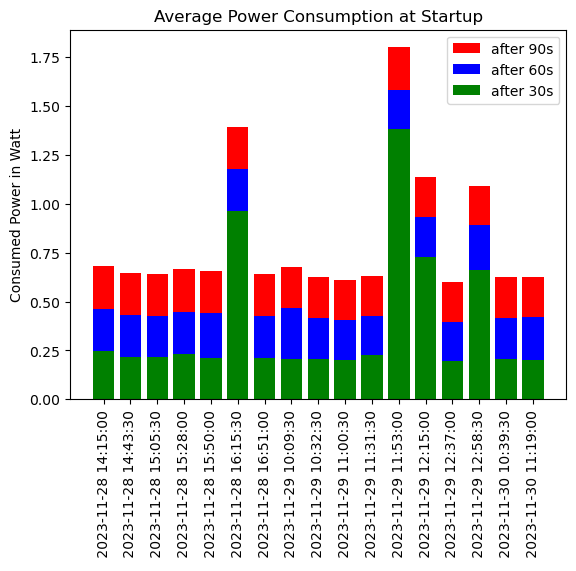

In [53]:
fig, ax = plt.subplots()

ax.bar(total_sums_accumulated.columns, total_sums.loc['W in First 90s',:], color= "r")
ax.bar(total_sums_accumulated.columns, total_sums.loc['W in First 1Min',:], color= "b")
ax.bar(total_sums_accumulated.columns, total_sums.loc['W in First 30s',:], color= "g")

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Average Power Consumption at Startup')
plt.xticks(rotation='vertical')
plt.legend(["after 90s","after 60s", "after 30s"])

plt.show()

In [54]:
summary_accumulated = pd.DataFrame()

summary_accumulated['Average'] = total_sums_accumulated.mean(axis=1)
# summary['average 60s'] = total_sums.loc['W in First 1Min',:].mean()
# summary['average 30s'] = total_sums.loc['W in First 30s',:].mean()

summary_accumulated

,Average
W in First 30s,0.383147
W in First 1Min,0.598288
W in First 90s,0.807818


In [55]:
# deviation from average

avg_power_consumption_30s = 0.42098888570039694 / 2 # this number is from Idle_1.1.ipynb

deviation = total_sums_individual - avg_power_consumption_30s

deviation

,2023-11-28 14:15:00,2023-11-28 14:43:30,2023-11-28 15:05:30,2023-11-28 15:28:00,2023-11-28 15:50:00,2023-11-28 16:15:30,2023-11-28 16:51:00,2023-11-29 10:09:30,2023-11-29 10:32:30,2023-11-29 11:00:30,2023-11-29 11:31:30,2023-11-29 11:53:00,2023-11-29 12:15:00,2023-11-29 12:37:00,2023-11-29 12:58:30,2023-11-30 10:39:30,2023-11-30 11:19:00
W 0s - 30s,0.037006,0.005706,0.003506,0.021706,0.002506,0.749906,0.002506,-0.003594,-0.005194,-0.007494,0.014306,1.169806,0.518606,-0.013494,0.450306,-0.002494,-0.008494
W 31s - 60s,0.001506,0.003606,0.003506,0.006106,0.019906,0.005106,0.003706,0.050706,0.002106,-0.007494,-0.007594,-0.008594,-0.007494,-0.010494,0.018406,-0.003494,0.009506
W 61s - 90s,0.013706,0.004606,0.003606,0.004706,0.002706,0.005006,0.003506,-0.003594,-0.005394,-0.007494,-0.007494,0.007506,-0.007494,-0.010094,-0.010094,-0.002594,-0.007494


### Plot Deviation

In [60]:
deviation_accumulated = pd.DataFrame()

for col, i in enumerate(deviation):
    deviation_accumulated.iloc[0,i] = deviation.loc[0,col].sum()
    deviation_accumulated.iloc[1, i] = deviation.loc[0:1,col].sum()
    deviation_accumulated.iloc[2, i] = deviation.loc[0:2,col].sum()

deviation_accumulated

KeyError: 0

## Conclusion

Measuring idle workers gave us an average of 0.42 W/min in Idle (see. ``Idle_1.1.jpynb``). Considering ...